# Data Modeling

## Data Modeling

### Importing libraries and load the datasets

In [1]:
# Importing libraries
import datetime
from datetime import datetime
import pandas as pd
import numpy as np
from openpyxl import Workbook
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# Load all the datasets
df = pd.read_excel(r"..\..\data\dataModelingOne\dataModelingOne_DimsumTJOEAN.xlsx")

In [3]:
df.head(10)

,DATE,Month,Year,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,2021-01-14,1,2021,0,1,0,0
1,2021-01-15,1,2021,0,0,1,0
2,2021-01-16,1,2021,1,0,0,0
3,2021-01-17,1,2021,0,2,3,0
4,2021-01-18,1,2021,0,0,1,0
5,2021-01-19,1,2021,4,1,1,0
6,2021-01-20,1,2021,1,0,0,0
7,2021-01-21,1,2021,0,1,1,0
8,2021-01-22,1,2021,1,1,1,0
9,2021-01-23,1,2021,1,1,3,0


In [4]:
df.tail(10)

,DATE,Month,Year,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
461,2023-05-09,5,2023,0,4,1,0
462,2023-05-20,5,2023,0,0,0,1
463,2023-05-24,5,2023,0,0,1,1
464,2023-05-25,5,2023,0,0,5,0
465,2023-05-31,5,2023,0,0,3,0
466,2023-07-07,7,2023,1,1,7,1
467,2023-08-05,8,2023,1,1,2,5
468,2023-08-28,8,2023,0,3,3,0
469,2023-08-31,8,2023,0,0,2,0
470,2023-09-11,9,2023,1,0,1,0


In [5]:
# Filter the dataframe to keep rows with 'DATE' on or before July 2023
df = df[df['DATE'] <= pd.Timestamp(2023, 7, 31)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 466
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   467 non-null    datetime64[ns]
 1   Month                  467 non-null    int64         
 2   Year                   467 non-null    int64         
 3   Shumai 10 Pcs          467 non-null    int64         
 4   Shumai 20 Pcs          467 non-null    int64         
 5   Shumai 30 Pcs          467 non-null    int64         
 6   Chicken Lumpia 10 Pcs  467 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 29.2 KB


In [7]:
'''plt.figure(figsize=(15,5))
plt.plot(df['DATE'], df['Shumai 30 Pcs'])
plt.xlabel('Date')
plt.xlabel('Shumai 30 Pcs')
plt.title("Monthly Customer Sales")
plt.show()'''

'plt.figure(figsize=(15,5))\nplt.plot(df[\'DATE\'], df[\'Shumai 30 Pcs\'])\nplt.xlabel(\'Date\')\nplt.xlabel(\'Shumai 30 Pcs\')\nplt.title("Monthly Customer Sales")\nplt.show()'

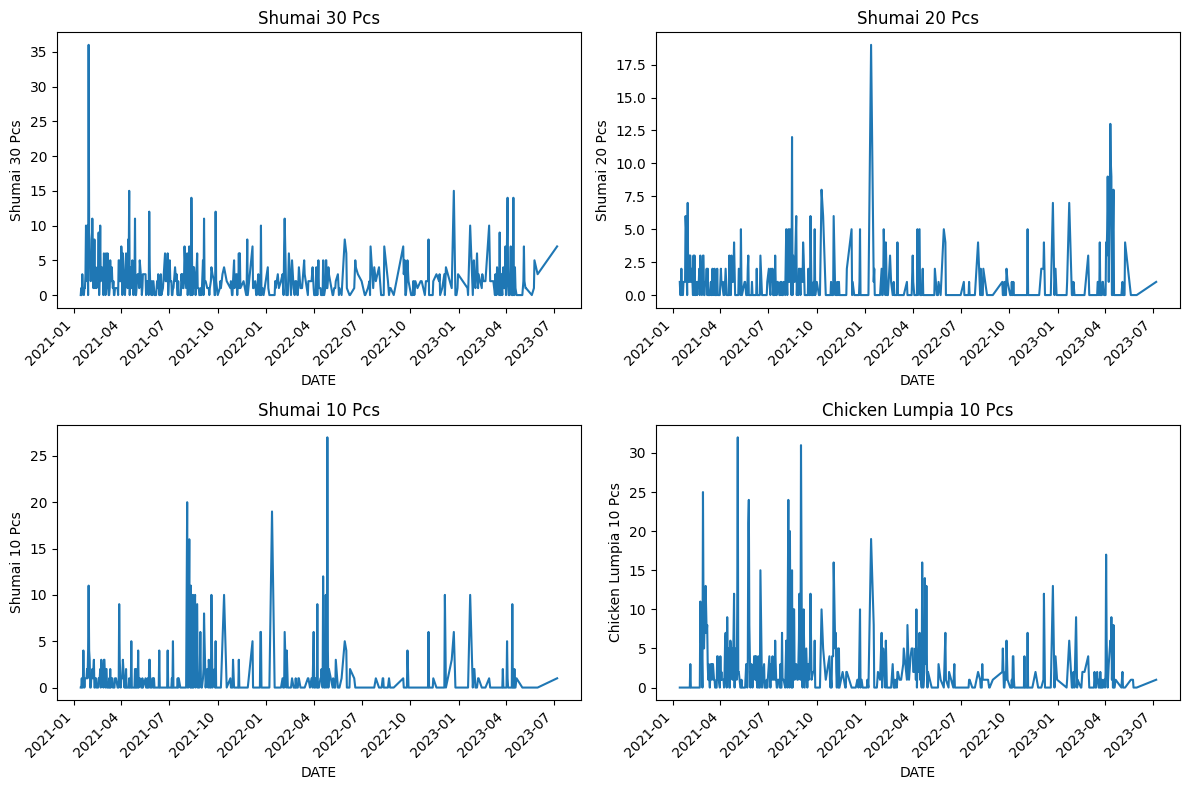

In [8]:
# Buat figure dan subplot menggunakan loop
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Daftar kolom untuk plot
columns_to_plot = ['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']

# Loop untuk membuat subplot
for i, column in enumerate(columns_to_plot):
    row_index = i // 2
    col_index = i % 2
    g = sns.lineplot(data=df, x='DATE', y=column, ax=axes[row_index, col_index], palette='mako')
    g.set_xticks(ticks = g.get_xticks(), labels = g.get_xticklabels(), rotation = 45, ha = 'right')
    axes[row_index, col_index].set_title(column)

plt.tight_layout()
plt.show()


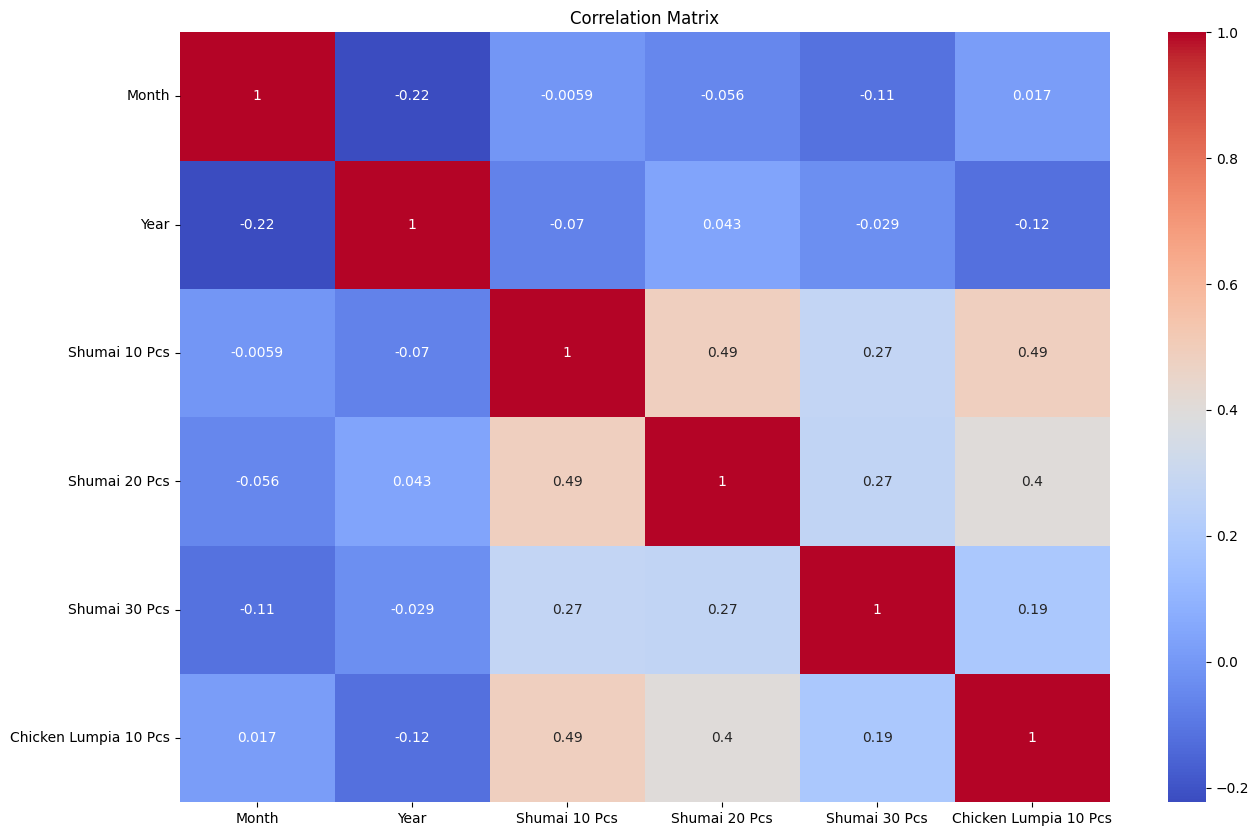

In [9]:
corr = df.iloc[:,1:].corr()
plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# LazyRegressor
# X = df.drop(columns=['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
# X = df[['YEAR', 'MONTH']]
# y = df.iloc[:, 1:5]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:4]
# y = df.iloc[:, 4:]
X = df.iloc[:, 1:3]
y = df.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

  5%|▍         | 2/42 [00:00<00:02, 14.46it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


 14%|█▍        | 6/42 [00:00<00:01, 23.86it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 26%|██▌       | 11/42 [00:00<00:02, 14.03it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


 57%|█████▋    | 24/42 [00:01<00:00, 26.83it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


 67%|██████▋   | 28/42 [00:01<00:01, 13.91it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
QuantileRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


 86%|████████▌ | 36/42 [00:02<00:00, 10.46it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


100%|██████████| 42/42 [00:03<00:00, 12.34it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (373, 4) instead.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.01,0.03,3.28,0.50
LinearRegression,-0.02,0.01,3.32,0.03
TransformedTargetRegressor,-0.02,0.01,3.32,0.04
Lars,-0.02,0.01,3.32,0.04
Ridge,-0.02,0.01,3.32,0.03
RidgeCV,-0.02,0.01,3.32,0.03
OrthogonalMatchingPursuit,-0.02,0.00,3.32,0.03
Lasso,-0.03,-0.01,3.36,0.04
DummyRegressor,-0.03,-0.01,3.36,0.03


In [11]:
# X = df[['YEAR', 'MONTH']]
# y = df.iloc[:, 1:5]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:4]
# y = df.iloc[:, 4:]
X = df.iloc[:, 1:3]
y = df.iloc[:, 3:]
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

   Month  Year
0      1  2021
1      1  2021
2      1  2021
3      1  2021
4      1  2021
   Shumai 10 Pcs  Shumai 20 Pcs  Shumai 30 Pcs  Chicken Lumpia 10 Pcs
0              0              1              0                      0
1              0              0              1                      0
2              1              0              0                      0
3              0              2              3                      0
4              0              0              1                      0
(467, 2)
(467, 4)


In [12]:
# ExtraTreesRegressor
# X = df.drop(columns=['DATE', 'Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs'], axis=1)
# Y = df[['Shumai 30 Pcs', 'Shumai 20 Pcs', 'Shumai 10 Pcs', 'Chicken Lumpia 10 Pcs']]
# X = df.iloc[:, [0]]
# y = df.iloc[:, 1:]
# X = df.iloc[:, 1:4]
# y = df.iloc[:, 4:]
X = df.iloc[:, 1:3]
y = df.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg = ExtraTreesRegressor(n_estimators=1000, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')
print()
print(f'Type of X_test: {type(X_test)}')
print(f'Type of y_pred: {type(y_pred)}')
print(f'Score X_train & y_train: {reg.score(X_train, y_train)}')
print(f'Score X_test & y_test: {reg.score(X_test, y_test)}')
print(f'Predictive value: {y_pred}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Shape of X_train: (373, 2)
Shape of X_test: (94, 2)
Shape of y_train: (373, 4)
Shape of y_test: (94, 4)

Type of X_test: <class 'pandas.core.frame.DataFrame'>
Type of y_pred: <class 'numpy.ndarray'>
Score X_train & y_train: 0.13942826159979982
Score X_test & y_test: -0.03661390432616768
Predictive value: [[1.         0.52173913 2.08695652 3.86956522]
 [1.         0.52173913 2.08695652 3.86956522]
 [1.10526316 1.36842105 3.84210526 1.47368421]
 [0.         0.16666667 1.5        0.5       ]
 [0.82352941 1.05882353 3.70588235 3.64705882]
 [0.2        0.73333333 2.6        3.53333333]
 [2.64285714 1.57142857 3.07142857 5.78571429]
 [1.57142857 1.21428571 3.35714286 0.        ]
 [3.7        1.9        2.4        4.9       ]
 [0.11111111 0.11111111 2.11111111 0.22222222]
 [0.82352941 1.05882353 3.70588235 3.64705882]
 [0.82352941 1.05882353 3.70588235 3.64705882]
 [0.         0.16666667 1.5        0.5       ]
 [0.82352941 1.05882353 3.70588235 3.64705882]
 [0.11764706 0.41176471 1.94117647 0

In [13]:
prediction = reg.predict([[6,2023]])
prediction

array([[0.53428571, 0.61033333, 4.433     , 0.76757143]])

In [14]:
def regression_model(month, year):
    regressors = [
        ["ETR", ExtraTreesRegressor()],
        ["ETR 1", ExtraTreesRegressor(n_estimators=1000, random_state=0, verbose=0)],
        ["ETR 2", ExtraTreesRegressor(n_estimators=1000, random_state=42, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(n_estimators=1000, random_state=64, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(n_estimators=2000, random_state=0, verbose=0)],
        ["ETR 5", ExtraTreesRegressor(n_estimators=2000, random_state=42, verbose=0)],
        ["ETR 6", ExtraTreesRegressor(n_estimators=2000, random_state=64, verbose=0)]]

    data_for_pred = df[["Month", "Year", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
    variables = data_for_pred.iloc[:, 0:2]
    results = data_for_pred.iloc[:, 2:]

    predictionData = np.array([[month, year]])

    info = ""

    for item in regressors:
        regression = item[1]

        variables_train, variables_test, result_train, result_test = train_test_split(variables, results, 
                                                                                      test_size=0.2, random_state=64)
        
        regression.fit(variables_train, result_train)

        # Prediction for the test data
        prediction_test = regression.predict(variables_test)

        # Calculate metrics
        r2 = r2_score(result_test, prediction_test, multioutput='variance_weighted')
        mae = mean_absolute_error(result_test, prediction_test, multioutput='raw_values')
        mse = mean_squared_error(result_test, prediction_test, multioutput='raw_values')
        rmse = np.sqrt(mse)
        
        info += (f"{item[0]} R^2: {r2:.2f} | MAE: {mae.mean():.2f} | MSE: {mse.mean():.2f} | RMSE: {rmse.mean():.2f}\n")

    return info

# Run the modified regression model function for a specific month (example: 36)
regression_info = regression_model(6, 2023)
regression_info

'ETR R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 1 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 2 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 3 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 4 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 5 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\nETR 6 R^2: -0.07 | MAE: 1.78 | MSE: 8.97 | RMSE: 2.92\n'

In [15]:
# Fungsi untuk mengevaluasi model dengan proporsi data uji yang berbeda
def evaluate_model_test_sizes(month, year, test_sizes):
    results = []
    for test_size in test_sizes:
        regressor = ExtraTreesRegressor(n_estimators=1000, random_state=42, verbose=0)
        variables = df[["Month", "Year"]]
        results_data = df.iloc[:, 3:]
        
        variables_train, variables_test, result_train, result_test = train_test_split(variables, results_data, 
                                                                                      test_size=test_size, random_state=64)
        regressor.fit(variables_train, result_train)
        prediction_test = regressor.predict(variables_test)
        
        # Calculate metrics
        r2 = r2_score(result_test, prediction_test, multioutput='variance_weighted')
        mae = mean_absolute_error(result_test, prediction_test)
        mse = mean_squared_error(result_test, prediction_test)
        rmse = np.sqrt(mse)
        
        results.append({
            'test_size': test_size,
            'R^2': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })
    
    return pd.DataFrame(results)

# List of different test sizes to evaluate
test_sizes = [0.2, 0.3, 0.4]

# Evaluate model performance across different test sizes
model_test_size_evaluation = evaluate_model_test_sizes(6, 2023, test_sizes)
model_test_size_evaluation

,test_size,R^2,MAE,MSE,RMSE
0,0.20,-0.07,1.78,8.97,3.00
1,0.30,-0.09,1.78,8.48,2.91
2,0.40,-0.10,1.76,8.17,2.86


In [16]:
# Simplified and optimized version of the function with reduced number of models and estimators for demonstration
def optimized_regression_model(month, year):
    regressors = [
        ["ETR", ExtraTreesRegressor()],
        ["ETR 1", ExtraTreesRegressor(n_estimators=1000, random_state=0, verbose=0)],
        ["ETR 2", ExtraTreesRegressor(n_estimators=1000, random_state=42, verbose=0)],
        ["ETR 3", ExtraTreesRegressor(n_estimators=1000, random_state=64, verbose=0)],
        ["ETR 4", ExtraTreesRegressor(n_estimators=2000, random_state=0, verbose=0)],
        ["ETR 5", ExtraTreesRegressor(n_estimators=2000, random_state=42, verbose=0)],
        ["ETR 6", ExtraTreesRegressor(n_estimators=2000, random_state=64, verbose=0)]
        ]

    test_sizes = [0.2, 0.3, 0.4]
    results_list = []

    for test_size in test_sizes:
        for item in regressors:
            regression = item[1]
            data_for_pred = df[["Month", "Year", "Shumai 10 Pcs", "Shumai 20 Pcs", "Shumai 30 Pcs", "Chicken Lumpia 10 Pcs"]]
            X = data_for_pred.iloc[:, 0:2]
            y = data_for_pred.iloc[:, 2:]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=64)
            
            regression.fit(X_train, y_train)
            y_pred_test = regression.predict(X_test)
            
            # Calculate metrics
            r2 = r2_score(y_test, y_pred_test, multioutput='variance_weighted')
            mae = mean_absolute_error(y_test, y_pred_test, multioutput='raw_values').mean()
            mse = mean_squared_error(y_test, y_pred_test, multioutput='raw_values').mean()
            rmse = np.sqrt(mse)

            # Predicting sales for the given month
            prediction = regression.predict(np.array([[month, year]]))

            results_list.append({
                'Regressor': item[0],
                'Test Size': test_size,
                'R^2': r2,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'Shumai 10 Pcs': prediction[0][0],
                'Shumai 20 Pcs': prediction[0][1],
                'Shumai 30 Pcs': prediction[0][2],
                'Chicken Lumpia 10 Pcs': prediction[0][3]
            })

    return pd.DataFrame(results_list).style.background_gradient(cmap = 'Blues')

# Run the optimized function
optimized_results_df = optimized_regression_model(6, 2023)
optimized_results_df

,Regressor,Test Size,R^2,MAE,MSE,RMSE,Shumai 10 Pcs,Shumai 20 Pcs,Shumai 30 Pcs,Chicken Lumpia 10 Pcs
0,ETR,0.200000,-0.066656,1.775771,8.971363,2.995223,0.058333,0.455556,2.244444,0.311111
1,ETR 1,0.200000,-0.066656,1.775752,8.971363,2.995223,0.032667,0.450667,2.234667,0.272000
2,ETR 2,0.200000,-0.066656,1.775754,8.971363,2.995223,0.039667,0.452000,2.237333,0.282667
3,ETR 3,0.200000,-0.066656,1.775749,8.971363,2.995223,0.029167,0.450000,2.233333,0.266667
4,ETR 4,0.200000,-0.066656,1.775749,8.971363,2.995223,0.029167,0.450000,2.233333,0.266667
5,ETR 5,0.200000,-0.066656,1.775751,8.971363,2.995223,0.033833,0.450889,2.235111,0.273778
6,ETR 6,0.200000,-0.066656,1.775749,8.971363,2.995223,0.029750,0.450111,2.233556,0.267556
7,ETR,0.300000,-0.087425,1.776353,8.475936,2.911346,0.046667,0.453333,2.240000,0.293333
8,ETR 1,0.300000,-0.087434,1.776367,8.476009,2.911359,0.064167,0.456667,2.246667,0.320000
9,ETR 2,0.300000,-0.087436,1.776370,8.476022,2.911361,0.070000,0.457778,2.248889,0.328889
